##Tahap 1

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training.xlsx to training (3).xlsx
Saving validation.xlsx to validation (3).xlsx


In [ ]:
train_df = pd.read_excel("training.xlsx", header=None)
val_df   = pd.read_excel("validation.xlsx", header=None)

# Konversi target: Iris-setosa = 0, Iris-versicolor = 1 (kolom 5)
train_df[5] = np.where(train_df[5] == 'Iris-setosa', 0, 1)
val_df[5]   = np.where(val_df[5] == 'Iris-setosa', 0, 1)

# Pisahkan fitur (kolom 1-4) dan target (kolom 5)
X_train = train_df.iloc[:, 1:5].values
y_train = train_df.iloc[:, 5].values
X_val   = val_df.iloc[:, 1:5].values
y_val   = val_df.iloc[:, 5].values

In [ ]:
print(X_train, y_train)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.2]
 [4.6 3.4 1.4 0.2]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.2]
 [4.3 3.  1.1 0.2]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.2]
 [5.4 3.9 1.3 0.2]
 [5.1 3.5 1.4 0.2]
 [5.7 3.8 1.7 0.2]
 [5.1 3.8 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.2]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.2]
 [5.2 4.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [7.  3.2 4.7 0.2]
 [6.4 3.2 4.5 0.2]
 [6.9 3.1 4.9 0.2]
 [5.5 2.3 4.  0.2]
 [6.5 2.8 4.6 0.2]
 [5.7 2.8 4.5 0.2]
 [6.3 3.3 4.7 0.2]
 [4.9 2.4 3.3 0.2]
 [6.6 2.9 4.6 0.2]
 [5.2 2.7 3.9 0.2]
 [5.  2.  3.5 0.2]
 [5.9 3.  4.2 0.2]
 [6.  2.2 4.

##Tahap 2: Mendefinisikan Fungsi

In [ ]:
def init_params():
    weight = np.full(X_train.shape[1], 0.5)  # semua 0.5
    bias = 0.5
    learning_rate = 0.1
    return weight, bias, learning_rate

# 2. Dot product
def dot_product(X, weight, bias):
    return np.dot(X, weight) + bias

# 3. Aktivasi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Error function (square error)
def square_error(pred, target):
    return (pred - target) ** 2

# 5. Update bobot & bias
def update_params(X, pred, target, weight, bias, learning_rate):
    d_error = 2 * (pred - target) * pred * (1 - pred)  # turunan sigmoid
    weight -= learning_rate * d_error * X
    bias -= learning_rate * d_error
    return weight, bias

# 6. Prediksi
def predict(X, weight, bias):
    return 1 if sigmoid(dot_product(X, weight, bias)) > 0.5 else 0

# 7. Akurasi
def accuracy(preds, targets):
    return np.mean(np.array(preds) == np.array(targets))

##Tahap 3: Training dan Validasi


In [ ]:
def train_and_validate(epochs=5):
    weight, bias, lr = init_params()
    train_errors, val_errors = [], []
    train_accs, val_accs = [], []

    print("=== TRAINING & VALIDATION ===")
    for epoch in range(epochs):
        total_error_train, total_error_val = 0, 0
        preds_train, preds_val = [], []

        print(f"\n--- Epoch {epoch+1} ---")

        # === TRAINING LOOP ===
        for i in range(len(X_train)):
            z = dot_product(X_train[i], weight, bias)   # dot product
            f = sigmoid(z)
            err = square_error(f, y_train[i])
            pred = 1 if f > 0.5 else 0

            # Update bobot & bias
            weight, bias = update_params(X_train[i], f, y_train[i], weight, bias, lr)

            # Akumulasi
            total_error_train += err
            preds_train.append(pred)

            #print(f"[Train] Idx={i}, Target={y_train[i]}, "
            #      f"z={z:.4f}, f={f:.4f}, Pred={pred}, "
            #      f"Err={err:.4f}, Weights={weight}, Bias={bias:.4f}")

        avg_error_train = total_error_train / len(X_train)
        acc_train = accuracy(preds_train, y_train)
        train_errors.append(avg_error_train)
        train_accs.append(acc_train)

        # === VALIDATION LOOP === (no update bobot)
        for j in range(len(X_val)):
            z = dot_product(X_val[j], weight, bias)
            f = sigmoid(z)
            err = square_error(f, y_val[j])
            pred = 1 if f > 0.5 else 0

            total_error_val += err
            preds_val.append(pred)

            #print(f"[Val]   Idx={j}, Target={y_val[j]}, "
            #      f"z={z:.4f}, f={f:.4f}, Pred={pred}, Err={err:.4f}")

        avg_error_val = total_error_val / len(X_val)
        acc_val = accuracy(preds_val, y_val)
        val_errors.append(avg_error_val)
        val_accs.append(acc_val)

        print(f"--- Epoch {epoch+1} Summary --- "
              f"Train Error={avg_error_train:.4f}, Train Acc={acc_train:.4f}, "
              f"Val Error={avg_error_val:.4f}, Val Acc={acc_val:.4f}")

    return train_errors, val_errors, train_accs, val_accs, weight, bias

In [ ]:
train_errors, val_errors, train_accs, val_accs, final_w, final_b = train_and_validate(epochs=5)

=== TRAINING & VALIDATION ===

--- Epoch 1 ---
--- Epoch 1 Summary --- Train Error=0.4494, Train Acc=0.5250, Val Error=0.3712, Val Acc=0.5000

--- Epoch 2 ---
--- Epoch 2 Summary --- Train Error=0.0512, Train Acc=0.9375, Val Error=0.2989, Val Acc=0.5000

--- Epoch 3 ---
--- Epoch 3 Summary --- Train Error=0.0332, Train Acc=0.9500, Val Error=0.2278, Val Acc=0.5000

--- Epoch 4 ---
--- Epoch 4 Summary --- Train Error=0.0231, Train Acc=0.9750, Val Error=0.1656, Val Acc=0.5000

--- Epoch 5 ---
--- Epoch 5 Summary --- Train Error=0.0171, Train Acc=0.9750, Val Error=0.1160, Val Acc=0.9000


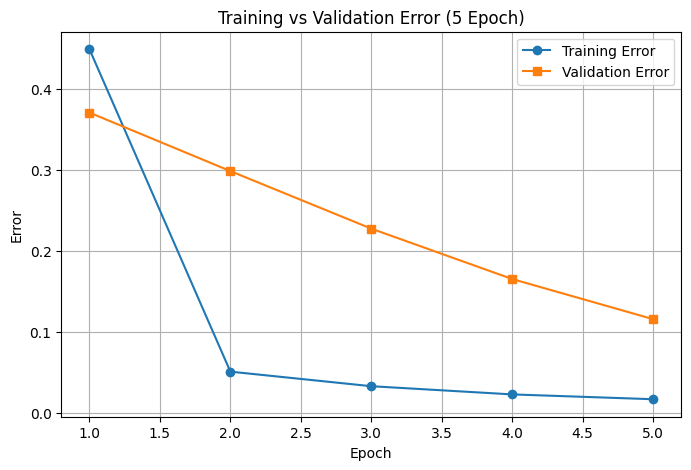

In [ ]:
# ---------------- Grafik Error ----------------
plt.figure(figsize=(8,5))
plt.plot(range(1,6), train_errors, marker='o', label="Training Error")
plt.plot(range(1,6), val_errors, marker='s', label="Validation Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Training vs Validation Error (5 Epoch)")
plt.legend()
plt.grid(True)
plt.show()

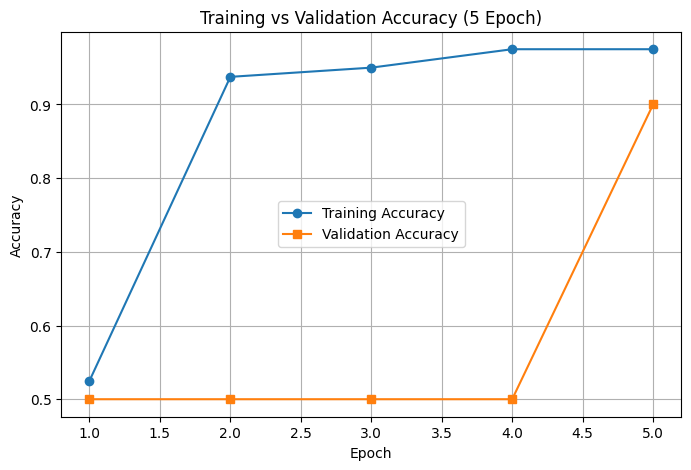

In [ ]:
# ---------------- Grafik Akurasi ----------------
plt.figure(figsize=(8,5))
plt.plot(range(1,6), train_accs, marker='o', label="Training Accuracy")
plt.plot(range(1,6), val_accs, marker='s', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (5 Epoch)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results = pd.DataFrame({
    "Epoch": range(1,6),
    "Train Error": train_errors,
    "Val Error": val_errors,
    "Train Acc": train_accs,
    "Val Acc": val_accs
})
print("\nHasil Training & Validation (5 Epoch):")
print(results.to_string(index=False))


Hasil Training & Validation (5 Epoch):
 Epoch  Train Error  Val Error  Train Acc  Val Acc
     1     0.408548   0.410788     0.5250      0.5
     2     0.003935   0.365588     0.9375      0.5
     3     0.005755   0.315934     0.9500      0.5
     4     0.007390   0.265576     0.9750      0.5
     5     0.008190   0.217746     0.9750      0.9
